In [1]:
#import relevant packages
import pandas as pd
import numpy as np
import gzip
import matplotlib.pyplot as plt
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

# fuzz is used to compare TWO strings
from fuzzywuzzy import fuzz

# process is used to compare a string to MULTIPLE other strings
from fuzzywuzzy import process

[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/meleciawright/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [2]:
amawed=pd.read_csv('amawed.csv')

In [2]:
#use jmc's code for pulling data in

def parse(path):
    g = gzip.open(path, 'r')
    for l in g:
        yield eval(l)
 
def parse(path):
    g = gzip.open(path, 'rb')
    for l in g:
        yield eval(l)

def getDF(path):
    i = 0
    df = {}
    for d in parse(path):
        df[i] = d
        i += 1
    return pd.DataFrame.from_dict(df, orient='index')

df = getDF('reviews_Grocery_and_Gourmet_Food_5.json.gz')
meta=getDF('meta_Grocery_and_Gourmet_Food.json.gz')
stars=pd.read_csv('ratings_Grocery_and_Gourmet_Food.csv')
stars.head()

,A1ZQZ8RJS1XVTX,0657745316,5.0,1381449600
0,A31W38VGZAUUM4,0700026444,5.0,1354752000
1,A3I0AV0UJX5OH0,1403796890,1.0,1385942400
2,A3QAAOLIXKV383,1403796890,3.0,1307836800
3,AB1A5EGHHVA9M,141278509X,5.0,1332547200
4,A3DTB6RVENLQ9Q,1453060375,1.0,1362268800


In [3]:
stars=pd.read_csv('ratings_Grocery_and_Gourmet_Food.csv',names=['reviewerID','asin','overall','unixReviewTime'])
print(len(stars))
meanstars=stars.groupby('asin').agg('mean')
meanstars['asin']=meanstars.index
meanstars['meanstars']=meanstars['overall']
#meanstars=meanstars[['asin','meanstars']].reset_index()
meanstars=meanstars[['asin','meanstars']]
meanstars.head()

1297156


,asin,meanstars
asin,,
0657745316,0657745316,5.0
0700026444,0700026444,5.0
1403796890,1403796890,2.0
141278509X,141278509X,5.0
1453060375,1453060375,1.0


### merge reviews and meta dfs
WHAT'S POSITIVE OR NEGATIVE? 

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151254 entries, 0 to 151253
Data columns (total 9 columns):
summary           151254 non-null object
overall           151254 non-null float64
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
helpful           151254 non-null object
reviewText        151254 non-null object
reviewerName      149761 non-null object
asin              151254 non-null object
reviewerID        151254 non-null object
dtypes: float64(1), int64(1), object(7)
memory usage: 11.5+ MB


In [5]:
meta.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171760 entries, 0 to 171759
Data columns (total 9 columns):
imUrl          171616 non-null object
categories     171760 non-null object
description    151817 non-null object
title          171602 non-null object
related        127270 non-null object
asin           171760 non-null object
salesRank      156972 non-null object
price          113152 non-null float64
brand          63905 non-null object
dtypes: float64(1), object(8)
memory usage: 13.1+ MB


In [6]:
metadf=pd.merge(meta,df,on='asin',how='outer')
print(len(meta),len(df),len(metadf))
metadf.head()
metadfmean=pd.merge(metadf,meanstars[['asin','meanstars']],on='asin',how='outer')
print(len(meta),len(df),len(metadf),len(meanstars),len(metadfmean))
metadfmean.head()

171760 151254 314301
171760 151254 314301 166049 314301


,related,categories,description,imUrl,asin,title,salesRank,price,brand,overall,reviewerName,reviewText,summary,helpful,reviewerID,unixReviewTime,reviewTime
0,{'also_viewed': ['B001GE8N4Y']},[[Grocery & Gourmet Food]],This is real vanilla extract made with only 3 ...,http://ecx.images-amazon.com/images/I/41gFi5h0...,0657745316,100 Percent All Natural Vanilla Extract,{'Grocery & Gourmet Food': 374004},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[[Grocery & Gourmet Food]],"Silverpot Tea, Pure Darjeeling, is an exquisit...",http://ecx.images-amazon.com/images/I/51hs8sox...,0700026444,Pure Darjeeling Tea: Loose Leaf,{'Grocery & Gourmet Food': 620307},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,[[Grocery & Gourmet Food]],Must have for any WWE Fan\n \n \n \nFeaturing ...,http://ecx.images-amazon.com/images/I/518SEST5...,1403796890,WWE Kids Todler Velvet Slippers featuring John...,NaN,3.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'also_viewed': ['B0051IETTY']},[[Grocery & Gourmet Food]],Infused with Vitamins and Electrolytes Good So...,http://ecx.images-amazon.com/images/I/51CFQIis...,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix ...,{'Grocery & Gourmet Food': 620322},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",[[Grocery & Gourmet Food]],MiO Energy is your portable energy source givi...,http://ecx.images-amazon.com/images/I/51EUsMcn...,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,{'Grocery & Gourmet Food': 268754},11.99,Mio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
metadfmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314301 entries, 0 to 314300
Data columns (total 17 columns):
related           264646 non-null object
categories        314301 non-null object
description       290900 non-null object
imUrl             313981 non-null object
asin              314301 non-null object
title             313967 non-null object
salesRank         292953 non-null object
price             232520 non-null float64
brand             162188 non-null object
overall           151254 non-null float64
reviewerName      149761 non-null object
reviewText        151254 non-null object
summary           151254 non-null object
helpful           151254 non-null object
reviewerID        151254 non-null object
unixReviewTime    151254 non-null float64
reviewTime        151254 non-null object
dtypes: float64(3), object(14)
memory usage: 43.2+ MB


In [8]:
metadfmean.to_csv('amawed.csv')

In [44]:
for x in [meta,df, metadf,metadfmean]:
    print(x.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171760 entries, 0 to 171759
Data columns (total 9 columns):
imUrl          171616 non-null object
categories     171760 non-null object
description    151817 non-null object
title          171602 non-null object
related        127270 non-null object
asin           171760 non-null object
salesRank      156972 non-null object
price          113152 non-null float64
brand          63905 non-null object
dtypes: float64(1), object(8)
memory usage: 13.1+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 151254 entries, 0 to 151253
Data columns (total 9 columns):
summary           151254 non-null object
overall           151254 non-null float64
unixReviewTime    151254 non-null int64
reviewTime        151254 non-null object
helpful           151254 non-null object
reviewText        151254 non-null object
reviewerName      149761 non-null object
asin              151254 non-null object
reviewerID        151254 non-null object
dtypes: flo

In [24]:
#GET A LIST OF BRANDS TO FACILITATE MERGING WITH USDA
st=[]
for b in metadfmean['brand'][metadfmean.brand.notnull()]:
    st.append(b.replace('&#39;',"'").replace('&reg;','').replace('&amp;','&'))
#metadfmean['cleanbrands']=st
#metadfmean.info()

In [44]:
#GET A LIST OF BRANDS TO FACILITATE MERGING WITH USDA
st=[]
for b in metadfmean['brand']:
    if type(b) is float:
        st.append(b)
    elif type(b) is not float:
        st.append(b.replace('&#39;',"'").replace('&reg;','').replace('&amp;','&'))
metadfmean['cleanbrands']=st
metadfmean.head()

,related,categories,description,imUrl,asin,title,salesRank,price,brand,overall,reviewerName,reviewText,summary,helpful,reviewerID,unixReviewTime,reviewTime,cleanbrands
0,{'also_viewed': ['B001GE8N4Y']},[[Grocery & Gourmet Food]],This is real vanilla extract made with only 3 ...,http://ecx.images-amazon.com/images/I/41gFi5h0...,0657745316,100 Percent All Natural Vanilla Extract,{'Grocery & Gourmet Food': 374004},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,[[Grocery & Gourmet Food]],"Silverpot Tea, Pure Darjeeling, is an exquisit...",http://ecx.images-amazon.com/images/I/51hs8sox...,0700026444,Pure Darjeeling Tea: Loose Leaf,{'Grocery & Gourmet Food': 620307},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,[[Grocery & Gourmet Food]],Must have for any WWE Fan\n \n \n \nFeaturing ...,http://ecx.images-amazon.com/images/I/518SEST5...,1403796890,WWE Kids Todler Velvet Slippers featuring John...,NaN,3.99,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,{'also_viewed': ['B0051IETTY']},[[Grocery & Gourmet Food]],Infused with Vitamins and Electrolytes Good So...,http://ecx.images-amazon.com/images/I/51CFQIis...,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix ...,{'Grocery & Gourmet Food': 620322},NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', '...",[[Grocery & Gourmet Food]],MiO Energy is your portable energy source givi...,http://ecx.images-amazon.com/images/I/51EUsMcn...,1453060375,Mio Energy Liquid Water Enhancer Black Cherry ...,{'Grocery & Gourmet Food': 268754},11.99,Mio,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Mio


In [45]:
metadfmean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314301 entries, 0 to 314300
Data columns (total 18 columns):
related           264646 non-null object
categories        314301 non-null object
description       290900 non-null object
imUrl             313981 non-null object
asin              314301 non-null object
title             313967 non-null object
salesRank         292953 non-null object
price             232520 non-null float64
brand             162188 non-null object
overall           151254 non-null float64
reviewerName      149761 non-null object
reviewText        151254 non-null object
summary           151254 non-null object
helpful           151254 non-null object
reviewerID        151254 non-null object
unixReviewTime    151254 non-null float64
reviewTime        151254 non-null object
cleanbrands       162188 non-null object
dtypes: float64(3), object(15)
memory usage: 45.6+ MB


In [52]:
metadfmean.description[0]

'This is real vanilla extract made with only 3 premium ingredients. GMO free, no fillers you find in store bought "vanilla extract." \n\nThe taste will knock your socks off. Everyone will notice a difference in your baking and cooking and they\'ll want to know your secret. I also use this for a special homemade coffee creamer that\'s out of this world and I use it for tea and black coffee as well as espresso drinks. You can add this to make a vanilla latte and skip the sugary syrup for a healthier latte with more flavor! \n\nWhen this item arrives, there will also be instructions to refill the product as its used so that you won\'t have to age it or repurchase it. I\'ve been using the same vanilla for 2 years now and have friends who\'ve had theirs for 5 years. It\'s just as tasteful, just as sweet, strong, and yummy. \n\nI use only top shelf liquor and the product is aged a minimum of 4 months. \n\nThese also make great gifts. I currently have plenty on the shelf but they won\'t be re

In [54]:
metadfmean.iloc[0]

related                                                                               {'also_viewed': ['B001GE8N4Y']}
categories                                                                                 [[Grocery & Gourmet Food]]
description       This is real vanilla extract made with only 3 premium ingredients. GMO free, no fillers you find...
imUrl                                                   http://ecx.images-amazon.com/images/I/41gFi5h0jYL._SY300_.jpg
asin                                                                                                       0657745316
title                                                                         100 Percent All Natural Vanilla Extract
salesRank                                                                          {'Grocery & Gourmet Food': 374004}
price                                                                                                             NaN
brand                                                   

In [64]:
seram=[]
for i in metadfmean.categories:#[metadfmean.categories.notnull()]:
    seram.append(i[0])
 
seram[:10]

[['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food'],
 ['Grocery & Gourmet Food', 'Beverages', 'Coffee', 'Coffee Substitutes'],
 ['Grocery & Gourmet Food']]

In [78]:
seramdf=pd.DataFrame(seram,columns=['Maincat','cat','cat3_122','cat4_190','cat5','cat6'])
seramdf.head()

,Maincat,cat,cat3_122,cat4_190,cat5,cat6
0,Grocery & Gourmet Food,None,None,None,None,None
1,Grocery & Gourmet Food,None,None,None,None,None
2,Grocery & Gourmet Food,None,None,None,None,None
3,Grocery & Gourmet Food,None,None,None,None,None
4,Grocery & Gourmet Food,None,None,None,None,None


In [81]:
amause=metadfmean.join(seramdf)

In [88]:
amause.groupby('brand')['title'].count()

brand
                                                   875
&Uuml;lker                                          10
&aacute;vitae                                      328
&amp; Salty Popcorn Chips Baked Snacks (Pack 4)      1
---                                                  1
100 Calorie Packs                                   22
100 Grand                                            3
10K                                                  4
123 Gluten Free                                     10
17th Street BBQ                                      1
18 Rabbits                                          10
180 Snacks                                           7
1883                                                 4
1907                                                 1
1st Endurance                                        3
200000 Mg Glutathione                                1
21st Century                                         2
21st century snacks                                  2
22 D

In [93]:
amb=amause.cleanbrands.value_counts().index 
amb[:5]
pd.DataFrame(amb).to_csv('amb.csv')

Index(['Bob's Red Mill', 'Green Mountain Coffee', 'Lipton', 'Barilla',
       'Nutiva'],
      dtype='object')

In [98]:
amause.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 314301 entries, 0 to 314300
Data columns (total 24 columns):
related           264646 non-null object
categories        314301 non-null object
description       290900 non-null object
imUrl             313981 non-null object
asin              314301 non-null object
title             313967 non-null object
salesRank         292953 non-null object
price             232520 non-null float64
brand             162188 non-null object
overall           151254 non-null float64
reviewerName      149761 non-null object
reviewText        151254 non-null object
summary           151254 non-null object
helpful           151254 non-null object
reviewerID        151254 non-null object
unixReviewTime    151254 non-null float64
reviewTime        151254 non-null object
cleanbrands       162188 non-null object
Maincat           314301 non-null object
cat               16468 non-null object
cat3_122          15833 non-null object
cat4_190          10628 non

In [104]:
amause.reviewText[amause.reviewText.notnull()].head()

17    Just another flavor of Kit Kat but the taste is unique and a bit different.  The only thing that...
18    I bought this on impulse and it comes from Japan,  which amused my family,  all those weird stam...
19    Really good. Great gift for any fan of green tea! Just so expensive to purchase candy from acros...
20    I had never had it before, was curious to see what it was like. Smooth, great subtle good flavor...
21    I've been looking forward to trying these after hearing about how popular they were in Japan, an...
Name: reviewText, dtype: object

In [97]:
amause.head()

,related,categories,description,imUrl,asin,title,salesRank,price,brand,overall,...,reviewerID,unixReviewTime,reviewTime,cleanbrands,Maincat,cat,cat3_122,cat4_190,cat5,cat6
0,{'also_viewed': ['B001GE8N4Y']},[[Grocery & Gourmet Food]],"This is real vanilla extract made with only 3 premium ingredients. GMO free, no fillers you find...",http://ecx.images-amazon.com/images/I/41gFi5h0jYL._SY300_.jpg,0657745316,100 Percent All Natural Vanilla Extract,{'Grocery & Gourmet Food': 374004},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Grocery & Gourmet Food,None,None,None,None,None
1,NaN,[[Grocery & Gourmet Food]],"Silverpot Tea, Pure Darjeeling, is an exquisite tea enjoyed at leisure, when you want to relax o...",http://ecx.images-amazon.com/images/I/51hs8sox%2BJL._SY300_.jpg,0700026444,Pure Darjeeling Tea: Loose Leaf,{'Grocery & Gourmet Food': 620307},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Grocery & Gourmet Food,None,None,None,None,None
2,NaN,[[Grocery & Gourmet Food]],Must have for any WWE Fan\n \n \n \nFeaturing John Cena slippers \n\nmade of velvet\n \ncolor Bl...,http://ecx.images-amazon.com/images/I/518SEST5DqL._SY300_.jpg,1403796890,WWE Kids Todler Velvet Slippers featuring John Cena size 7/8 Infants COLOR Black -,NaN,3.99,NaN,NaN,...,NaN,NaN,NaN,NaN,Grocery & Gourmet Food,None,None,None,None,None
3,{'also_viewed': ['B0051IETTY']},[[Grocery & Gourmet Food]],Infused with Vitamins and Electrolytes Good Source of Calcium,http://ecx.images-amazon.com/images/I/51CFQIisucL._SY300_.jpg,141278509X,Archer Farms Strawberry Dragonfruit Drink Mix 8-0.16 Oz Packets,{'Grocery & Gourmet Food': 620322},NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,Grocery & Gourmet Food,None,None,None,None,None
4,"{'also_viewed': ['B006MSEOJ2', 'B005VOOQLO', 'B005VOOQKA', 'B00C121U9A', 'B00CEPYH6W', 'B009T6U1...",[[Grocery & Gourmet Food]],MiO Energy is your portable energy source giving you energy whenever and wherever you need it!\n...,http://ecx.images-amazon.com/images/I/51EUsMcnVVL._SX300_.jpg,1453060375,Mio Energy Liquid Water Enhancer Black Cherry &amp; Green Thunder 1.62oz,{'Grocery & Gourmet Food': 268754},11.99,Mio,NaN,...,NaN,NaN,NaN,Mio,Grocery & Gourmet Food,None,None,None,None,None


# Natural Language Processing
## packages

In [105]:
amareviews=amause[amause.reviewText.notnull()]
len(amareviews)

151254

In [167]:
amareviews['bistar'] = np.where(amareviews['overall']>4, 1, 0) 

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [238]:
amareviews.Maincat.value_counts()

Grocery & Gourmet Food    151254
Name: Maincat, dtype: int64

In [239]:
amareviews.cat.value_counts()

Cooking & Baking                      1668
Beverages                             1420
Canned, Dry & Packaged Foods           910
Baby Foods                             656
Snack Foods                            315
Candy & Chocolate                      236
Breakfast Foods                        208
Gourmet Gifts                            7
Fresh Flowers & Live Indoor Plants       5
Name: cat, dtype: int64

In [240]:
amareviews.cat3_122.value_counts()

Tea                                 648
Herbs, Spices & Seasonings          622
Baby Formula                        533
Cooking Oils, Vinegars & Sprays     511
Coffee                              309
Sugar Substitutes                   304
Syrups, Sugars & Sweeteners         290
Nuts & Seeds                        263
Breakfast & Cereal Bars             177
Jams, Jellies & Sweet Spreads       165
Chewing Gum                         149
Soda Syrups                         135
Meal Replacement Drinks             108
Fruit Leather                        85
Fruit                                81
Popcorn                              77
Leaveners & Yeasts                   76
Frosting, Icing & Decorations        70
Powdered Drink Mixes                 63
Flours & Meals                       57
Packaged Meals & Side Dishes         50
Hot Cocoa                            43
Canned & Jarred Food                 43
Fruit Snacks                         38
Cereals                              31


In [234]:
amareviews.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151254 entries, 17 to 314036
Data columns (total 25 columns):
related           145832 non-null object
categories        151254 non-null object
description       147553 non-null object
imUrl             151065 non-null object
asin              151254 non-null object
title             151065 non-null object
salesRank         144292 non-null object
price             126734 non-null float64
brand             104238 non-null object
overall           151254 non-null float64
reviewerName      149761 non-null object
reviewText        151254 non-null object
summary           151254 non-null object
helpful           151254 non-null object
reviewerID        151254 non-null object
unixReviewTime    151254 non-null float64
reviewTime        151254 non-null object
cleanbrands       104238 non-null object
Maincat           151254 non-null object
cat               5425 non-null object
cat3_122          5311 non-null object
cat4_190          3402 non-n

In [149]:
catind=amareviews.cat3_122.value_counts().index.tolist()
for i,val in enumerate(catind):
    catind[i]=val.lower()
catind[:5]

['Tea',
 'Herbs, Spices & Seasonings',
 'Baby Formula',
 'Cooking Oils, Vinegars & Sprays',
 'Coffee']

In [153]:
(pd.DataFrame(catind)).to_csv('catind.csv')

In [271]:
short=[('tomato'and'sauce'),
                 'bread', 'flour','pasta','noodle',
            'creamer',
             'soda', 'soft drink' , 'drink' , 'beverage',
             'candy','ice cream',
             'juice','yogurt','ketchup',
 'peanut' , 'walnut' , 'cashew' , 'macadamia' , 'pecans' ,
'salsa',  
'cracker' , 'cake' , 'cookie' , 'bak','frosting', ('can'and 'beans'),
('protein' and 'bar'),             ('energy' and 'bar'),
'cereal','granola', 'oatmeal' ,'chips' ,'crisps']
 

In [289]:
shortlist=[('tomato'and'sauce'), ('can'and 'beans'),
('protein' and 'bar'),             ('energy' and 'bar'),
                 'bread', 'pasta','noodle',
            'creamer',
             'soda', 'soft drink' , 'drink' , 'beverage',
             'candy','ice cream',
'cracker' , 'cake' , 'cookie' , 'frosting',
             'juice','yogurt','ketchup','salsa',  
 'peanut' , 'walnut' , 'cashew' , 'macadamia' , 'pecans' ,

'cereal','granola', 'oatmeal' ,'chips' ,'crisps', 'chocolate','seed' ]
 

In [216]:
amti=metadfmean[metadfmean.title.notnull()]

In [272]:
al={} 
for j in short:
    ticat=[]
    for i in amti.title:
        if j in i.lower():ticat.append(i)
        else:continue 
    al[j]=ticat
 al={} 
for i in amti.title:
    for j in short:
        ticat=[]
        if j in i.lower():al[j]=i
        else:continue 
    al[j]=ticat
 dicount=[]
for i in al:
    dicount.append([i,len(al[i])])
dicount

In [ ]:
shortlist=[('tomato'and'sauce'), ('can'and 'beans'),
('protein' and 'bar'),             ('energy' and 'bar'),
                 'bread', 'pasta','noodle',
            'creamer',
             'soda', 'soft drink' , 'drink' , 'beverage',
             'candy','ice cream',
'cracker' , 'cake' , 'cookie' , 'frosting',
             'juice','yogurt','ketchup','salsa',  
 'peanut' , 'walnut' , 'cashew' , 'macadamia' , 'pecans' ,

'cereal','granola', 'oatmeal' ,'chips' ,'crisps', 'chocolate','seed' ]
 

In [301]:
al={} 
melcat=[]
for j in [('tomato'and'sauce')]:
    for i in amti.title:
        for pos in range(len(amti.title)-1):
            if (j not in i.lower()):melcat.append(None)
            elif (j in i.lower()) and melcat[pos] is None:melcat.append(i)
len(melcat) 

The history saving thread hit an unexpected error (OperationalError('unable to open database file',)).History will not be written to the database.


KeyboardInterrupt: 

In [303]:
categories = [['fast_food', 'restaurant'], ['coffee', 'cafe'], ['burger', 'restaurant']]
counts = [137, 176, 390]
aadf = pd.DataFrame({'categories': categories, 'review_count': counts})
# Show which rows contain 'restaurant'
aadf.categories.map(lambda x: 'restaurant' in x)
# Subset the dataframe using this:
aadf[aadf.categories.map(lambda x: 'restaurant' in x)]

,categories,review_count
0,"[fast_food, restaurant]",137
2,"[burger, restaurant]",390


In [310]:
amtidf=metadfmean[metadfmean.title.notnull()]
amtidf['icecream']=1*amtidf['title'].str.contains("ice cream")

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


In [319]:
amtidf['sauce']=amtidf.ix[:,'title'].str.contains('sauce')

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [4]:
amtidf=amawed[amawed.title.notnull()]

In [5]:
amtidf['newcat']=amtidf.loc[amtidf.title.str.contains('cashew')]='cashew'

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/meleciawright/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:465: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [6]:
amtidf['newcat']=amtidf.loc[amtidf.title.str.contains('chocolate')]='chocolate'

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
/Users/meleciawright/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#

In [20]:
#amtidf['newcat']=amtidf.loc[amtidf.title.str.contains('chocolate')]='chocolate'
amtidf.loc[amtidf['title'].str.contains("bread"),'newcat2'] = 'bread'

amtidf.newcat2.describe()

/Users/meleciawright/anaconda/lib/python3.5/site-packages/pandas/core/indexing.py:132: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app


count      1742
unique        2
top       bread
freq       1582
Name: newcat2, dtype: object

In [21]:
amtidf.newcat2.value_counts()

bread        1582
chocolate     160
Name: newcat2, dtype: int64

In [22]:
bread=amtidf[amtidf.newcat2=='bread']

In [23]:
bread.to_csv('bread.csv')

In [24]:
len(bread)

1582

In [ ]:
shortlist=[('tomato'and'sauce'), ('can'and 'beans'),
('protein' and 'bar'),             ('energy' and 'bar'),
                 'bread', 'pasta','noodle',
            'creamer',
             'soda', 'soft drink' , 'drink' , 'beverage',
             'candy','ice cream',
'cracker' , 'cake' , 'cookie' , 'frosting',
             'juice','yogurt','ketchup','salsa',  
 'peanut' , 'walnut' , 'cashew' , 'macadamia' , 'pecans' ,

'cereal','granola', 'oatmeal' ,'chips' ,'crisps', 'chocolate','seed' ]
 

categories = [['fast_food', 'restaurant'], ['coffee', 'cafe'], ['burger', 'restaurant']]
counts = [137, 176, 390]
df = pd.DataFrame({'categories': categories, 'review_count': counts})
# Show which rows contain 'restaurant'
df.categories.map(lambda x: 'restaurant' in x)
# Subset the dataframe using this:
df[df.categories.map(lambda x: 'restaurant' in x)]

In [ ]:
al={} 
melcat=[]
for j in shortlist:
    for i in amti.title:
        for pos in range(len(amti.title)-1):
            if (j not in i.lower()):continue
            elif (j in i.lower()):
                if melcat[pos] is not none:continue
                elif melcat[pos] is None:melcat.append(i)
                 
len(melcat) 
al={} 
melcat=[]
for j in shortlist:
    for i in amti.title:
        if j in i.lower():melcat.append(j)
        else:melcat.append('nocat') 
len(melcat) 
al={} 
for j in short:
    ticat=[]
    for i in metadfmean[:10].title:
        if j in i:ticat.append(i)
        else:ticat.append(1*(j in i)) 
    al[j]=ticat
al={} 
for j in short:
    ticat=[]
    for i in metadfmean[:10].title:
        ticat.append(1*(j in i)) 
    al[j]=ticat
al

In [ ]:
fuzz.ratio('Emjoi AP-18MS Emagine Epilator for Men, Black','ortho bug-b-gon max insect killer for lawns 1')
fuzz.partial_ratio('Emjoi AP-18MS Emagine Epilator for Men, Black','ortho bug-b-gon max insect killer for lawns 1')
possibilities = process.extract(x.uniquename[20], a.names, limit=100, scorer=fuzz.token_sort_ratio)

In [25]:
bread.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1582 entries, 41 to 311743
Data columns (total 20 columns):
Unnamed: 0        1582 non-null object
related           1243 non-null object
categories        1582 non-null object
description       1469 non-null object
imUrl             1582 non-null object
asin              1582 non-null object
title             1582 non-null object
salesRank         1485 non-null object
price             1049 non-null object
brand             742 non-null object
overall           701 non-null object
reviewerName      700 non-null object
reviewText        700 non-null object
summary           701 non-null object
helpful           701 non-null object
reviewerID        701 non-null object
unixReviewTime    701 non-null object
reviewTime        701 non-null object
newcat            1582 non-null object
newcat2           1582 non-null object
dtypes: object(20)
memory usage: 259.5+ KB


In [43]:
from nltk.stem import WordNetLemmatizer
wordnet_lemmatizer = WordNetLemmatizer()


In [59]:
b=bread[bread.reviewText.notnull()]

In [61]:
review=''
corpus = []
for i in b.index.tolist() :
    review = re.sub('[^a-zA-Z]', ' ', b.reviewText[i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

In [62]:
b['bistar'] = np.where(b['overall']>4, 1, 0) 
b.bistar.value_counts()

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


1    477
0    223
Name: bistar, dtype: int64

In [92]:

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = b['bistar'].values



# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = corpus
y = b['bistar'].values


list_corpus = corpus
list_labels = b['bistar'].values

X_train, X_test, y_train, y_test = train_test_split(list_corpus, list_labels, test_size=0.2, 
                                                                                random_state=40)

X_train_counts= cv.fit_transform(X_train)
X_test_counts = cv.transform(X_test)

In [93]:
# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)


In [100]:
#lets try tfidf
#from sklearn.feature_extraction.text import   TfidfVectorizer

tfidf_vectorizer = TfidfVectorizer()

Xtfv=tfidf_vectorizer.fit_transform(corpus).toarray()
X_traintfv, X_testtfv, y_traintfv, y_testtfv = train_test_split(Xtfv, y, test_size = 0.20, random_state = 0)


In [101]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)


# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm #first array([[20, 20],  [41, 59]])

array([[20, 20],
       [41, 59]])

In [103]:

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_traintfv, y_traintfv)


# Predicting the Test set results
y_pred = classifier.predict(X_testtfv)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_testtfv, y_pred)
cm #first array([[20, 20],  [41, 59]]); array([[16, 24], [33, 67]])


array([[16, 24],
       [33, 67]])

# Now Analyze sentiment

In [108]:
from textblob import TextBlob

In [109]:
wiki = TextBlob("Python is a high-level, general-purpose programming language.")


In [112]:
wiki.tags

[('Python', 'NNP'),
 ('is', 'VBZ'),
 ('a', 'DT'),
 ('high-level', 'JJ'),
 ('general-purpose', 'JJ'),
 ('programming', 'NN'),
 ('language', 'NN')]

In [113]:
wiki.noun_phrases

WordList(['python'])

In [114]:
wiki.sentiment

Sentiment(polarity=0.0, subjectivity=0.0)

In [118]:
testimonial = TextBlob("textblob is amazingly simple to use what great fun")
testimonial.sentiment.polarity

0.3666666666666667

In [135]:
TextBlob(b.reviewText[:1].values.item()).sentiment.polarity
sentcorpus = []
for i in b.index.tolist() :
    review =  TextBlob(b.reviewText[i]).sentiment.polarity 
    review = ' '.join(review)
    sentcorpus.append(review)
sentcorpus

TypeError: can only join an iterable

In [141]:
TextBlob(b.reviewText[i]).sentiment

Sentiment(polarity=0.1989285714285714, subjectivity=0.3342857142857143)

In [145]:
def sentfun(text):
    return TextBlob(text).sentiment.polarity
def subfun(text):
    return TextBlob(text).sentiment.subjectivity
b['revsentiment']=b['reviewText'].apply(sentfun) 

def subfun(text):
    return TextBlob(text).sentiment.subjectivity
b['revsubjec']=b['reviewText'].apply(subfun) 

/Users/meleciawright/anaconda/lib/python3.5/site-packages/ipykernel/__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()


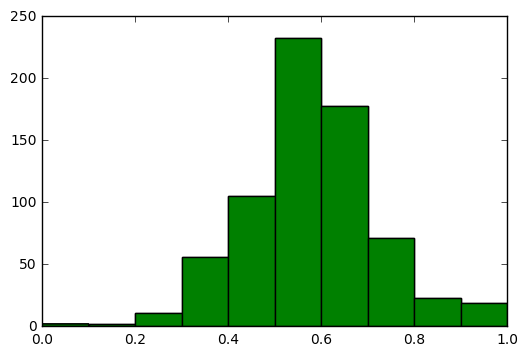

In [149]:
plt.hist(b.revsubjec)
plt.show()

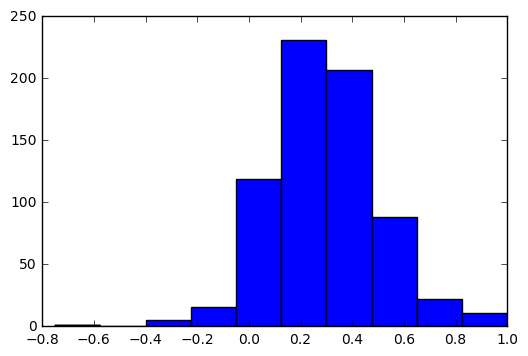

In [150]:
plt.hist(b.revsentiment)
plt.show()

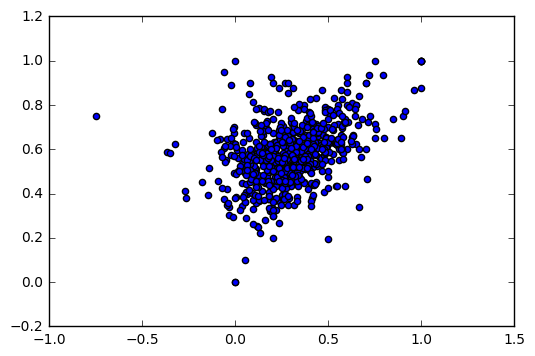

In [152]:
plt.scatter(b.revsentiment, b.revsubjec)
plt.show()

# Natural Language Processing

# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

# Importing the dataset
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter = '\t', quoting = 3)

# Cleaning the texts
import re
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
corpus = []
for i in range(0, 1000):
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    review = [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]
    review = ' '.join(review)
    corpus.append(review)

# Creating the Bag of Words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 1500)
X = cv.fit_transform(corpus).toarray()
y = dataset.iloc[:, 1].values

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = 0)

# Fitting Naive Bayes to the Training set
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

# Predicting the Test set results
y_pred = classifier.predict(X_test)

# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
# Thanks
To Julian McAuly for permitting use of data scraped by him/his team

WWW / SIGIR papers  
R. He, J. McAuley. Modeling the visual evolution of fashion trends
with one-class collaborative filtering. WWW, 2016
J. McAuley, C. Targett, J. Shi, A. van den Hengel. Image-based
recommendations on styles and substitutes. SIGIR, 2015